# Amazon Reviews Analysis Laboratory

## Introduction
Welcome to the Amazon Reviews Analysis Laboratory! In this session, we will explore natural language processing techniques to clean and preprocess customer reviews from Amazon.

### Learning Objectives
By the end of this laboratory, you will be able to:
1. Load and explore text datasets using pandas
2. Apply text preprocessing techniques including tokenization
3. Remove stopwords from text data
4. Visualize text data using word clouds and frequency plots
5. Prepare text data for vectorization and machine learning

### Dataset
We'll work with Amazon product reviews, which contain valuable customer feedback that can be analyzed for sentiment, topics, and patterns.

## Step 1: Import Required Libraries

First, let's import all the necessary libraries for our analysis.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Text processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import re
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning preparation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter

# Display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Download NLTK Data

Download necessary NLTK datasets for tokenization and stopword removal.

In [2]:
# Download NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

print("NLTK data downloaded successfully!")

NLTK data downloaded successfully!


[nltk_data] Downloading package punkt to /Users/blueagle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blueagle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/blueagle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/blueagle/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/blueagle/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Step 3: Create Sample Dataset

Since we don't have a real dataset available, let's create a sample Amazon reviews dataset for demonstration purposes.

In [3]:
# Create sample Amazon reviews dataset
sample_reviews = [
    "This product is absolutely amazing! I love it so much. Great quality and fast shipping.",
    "Poor quality product. Disappointed with the purchase. Would not recommend to others.",
    "The item arrived on time and works perfectly. Excellent customer service and support.",
    "Terrible experience. The product broke after just one day. Waste of money!",
    "Good value for money. The product meets my expectations. Will buy again.",
    "Outstanding product! Exceeded all my expectations. Highly recommended for everyone.",
    "Average product. Nothing special but does the job. Delivery was slow though.",
    "Fantastic quality and design. Love the color and functionality. Perfect for my needs.",
    "Not worth the price. Found better alternatives elsewhere. Customer service was unhelpful.",
    "Amazing product with great features. Easy to use and very durable. Five stars!",
    "The product description was misleading. Different from what I expected. Requesting refund.",
    "Superb quality and excellent packaging. Arrived earlier than expected. Very satisfied.",
    "Mediocre product at best. Works but could be better. Considering other options.",
    "Love this product! It's exactly what I was looking for. Great design and functionality.",
    "Horrible experience. Product damaged during shipping. Poor customer support response.",
    "Excellent product with amazing features. Worth every penny. Highly recommended!",
    "The product is okay but overpriced. Similar products available at lower prices.",
    "Perfect product for my needs. Great quality and fast delivery. Will order again.",
    "Disappointed with the quality. Not as described in the listing. Returning soon.",
    "Outstanding customer service and product quality. Exceeded my expectations completely."
]

# Create ratings (1-5 stars)
ratings = [5, 1, 4, 1, 3, 5, 3, 4, 2, 5, 2, 5, 3, 4, 1, 5, 2, 4, 2, 5]

# Create product categories
categories = ['Electronics', 'Books', 'Home & Garden', 'Sports', 'Electronics', 
             'Books', 'Home & Garden', 'Electronics', 'Sports', 'Books',
             'Electronics', 'Home & Garden', 'Sports', 'Electronics', 'Books',
             'Home & Garden', 'Sports', 'Electronics', 'Books', 'Home & Garden']

# Create DataFrame
df = pd.DataFrame({
    'review_text': sample_reviews,
    'rating': ratings,
    'category': categories
})

# Add review ID
df['review_id'] = range(1, len(df) + 1)

print(f"Dataset created with {len(df)} reviews")
print("\nFirst 5 reviews:")
df.head()

Dataset created with 20 reviews

First 5 reviews:


,review_text,rating,category,review_id
0,This product is absolutely amazing! I love it so much. Great quality and fast shipping.,5,Electronics,1
1,Poor quality product. Disappointed with the purchase. Would not recommend to others.,1,Books,2
2,The item arrived on time and works perfectly. Excellent customer service and support.,4,Home & Garden,3
3,Terrible experience. The product broke after just one day. Waste of money!,1,Sports,4
4,Good value for money. The product meets my expectations. Will buy again.,3,Electronics,5


## Step 4: Load and Explore Dataset

Let's explore our dataset to understand its structure and content.

In [4]:
# Dataset basic information
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (20, 4)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  20 non-null     object
 1   rating       20 non-null     int64 
 2   category     20 non-null     object
 3   review_id    20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes
None

Basic Statistics:
         rating  review_id
count  20.00000   20.00000
mean    3.30000   10.50000
std     1.49032    5.91608
min     1.00000    1.00000
25%     2.00000    5.75000
50%     3.50000   10.50000
75%     5.00000   15.25000
max     5.00000   20.00000


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Display sample reviews
print("\nSample Reviews:")
for i in range(3):
    print(f"Review {i+1} (Rating: {df.iloc[i]['rating']})")
    print(f"Text: {df.iloc[i]['review_text']}")
    print(f"Category: {df.iloc[i]['category']}")
    print("-" * 80)

Missing Values:
review_text    0
rating         0
category       0
review_id      0
dtype: int64

Sample Reviews:
Review 1 (Rating: 5)
Text: This product is absolutely amazing! I love it so much. Great quality and fast shipping.
Category: Electronics
--------------------------------------------------------------------------------
Review 2 (Rating: 1)
Text: Poor quality product. Disappointed with the purchase. Would not recommend to others.
Category: Books
--------------------------------------------------------------------------------
Review 3 (Rating: 4)
Text: The item arrived on time and works perfectly. Excellent customer service and support.
Category: Home & Garden
--------------------------------------------------------------------------------


## Step 5: Basic Text Analysis

Let's perform some basic analysis on our text data.

Text Length Statistics:
Average text length: 82.15 characters
Average word count: 12.00 words
Min text length: 72 characters
Max text length: 90 characters


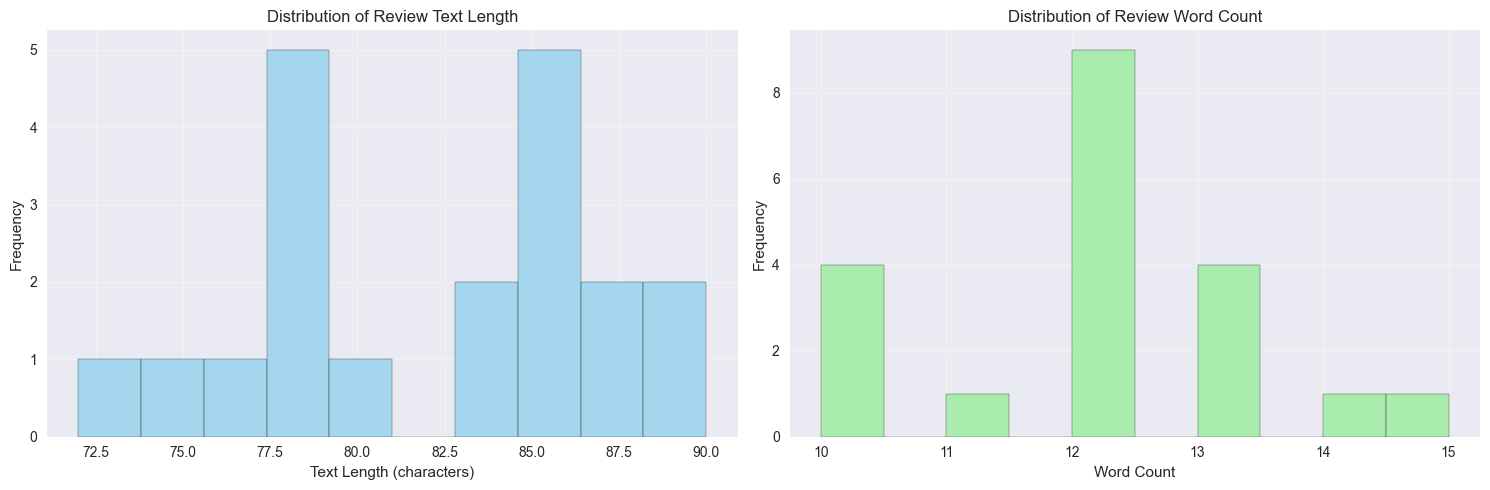

In [6]:
# Calculate text length statistics
df['text_length'] = df['review_text'].apply(len)
df['word_count'] = df['review_text'].apply(lambda x: len(x.split()))

print("Text Length Statistics:")
print(f"Average text length: {df['text_length'].mean():.2f} characters")
print(f"Average word count: {df['word_count'].mean():.2f} words")
print(f"Min text length: {df['text_length'].min()} characters")
print(f"Max text length: {df['text_length'].max()} characters")

# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Text length distribution
axes[0].hist(df['text_length'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Text Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Review Text Length')
axes[0].grid(True, alpha=0.3)

# Word count distribution
axes[1].hist(df['word_count'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Review Word Count')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 6: Text Preprocessing Functions

Let's create functions for text preprocessing including cleaning, tokenization, and stopword removal.

In [7]:
def clean_text(text):
    """
    Clean text by removing special characters, converting to lowercase, 
    and removing extra whitespace.
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_text(text):
    """
    Tokenize text into individual words.
    """
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    """
    Remove English stopwords from token list.
    """
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    """
    Lemmatize tokens to their base form.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def preprocess_text(text):
    """
    Complete preprocessing pipeline.
    """
    # Clean text
    cleaned_text = clean_text(text)
    
    # Tokenize
    tokens = tokenize_text(cleaned_text)
    
    # Remove stopwords
    tokens = remove_stopwords(tokens)
    
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    
    # Remove empty tokens
    tokens = [token for token in tokens if len(token) > 2]
    
    return tokens

print("Text preprocessing functions defined successfully!")

Text preprocessing functions defined successfully!


## Step 7: Apply Text Preprocessing

Now let's apply our preprocessing functions to the dataset.

In [8]:
# Apply preprocessing to all reviews
print("Applying text preprocessing...")

# Clean text
df['cleaned_text'] = df['review_text'].apply(clean_text)

# Tokenize and preprocess
df['processed_tokens'] = df['review_text'].apply(preprocess_text)

# Create processed text (join tokens back into text)
df['processed_text'] = df['processed_tokens'].apply(lambda x: ' '.join(x))

print("Text preprocessing completed!")

# Show before and after examples
print("\nBefore and After Preprocessing Examples:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['review_text']}")
    print(f"Cleaned: {df.iloc[i]['cleaned_text']}")
    print(f"Tokens: {df.iloc[i]['processed_tokens']}")
    print(f"Processed: {df.iloc[i]['processed_text']}")
    print("-" * 80)

Applying text preprocessing...
Text preprocessing completed!

Before and After Preprocessing Examples:

Example 1:
Original: This product is absolutely amazing! I love it so much. Great quality and fast shipping.
Cleaned: this product is absolutely amazing i love it so much great quality and fast shipping
Tokens: ['product', 'absolutely', 'amazing', 'love', 'much', 'great', 'quality', 'fast', 'shipping']
Processed: product absolutely amazing love much great quality fast shipping
--------------------------------------------------------------------------------

Example 2:
Original: Poor quality product. Disappointed with the purchase. Would not recommend to others.
Cleaned: poor quality product disappointed with the purchase would not recommend to others
Tokens: ['poor', 'quality', 'product', 'disappointed', 'purchase', 'would', 'recommend', 'others']
Processed: poor quality product disappointed purchase would recommend others
-------------------------------------------------------------

## Step 8: Tokenization Analysis

Let's analyze the tokenization results and examine the most frequent words.

In [9]:
# Count tokens per review
df['token_count'] = df['processed_tokens'].apply(len)

print("Tokenization Statistics:")
print(f"Average tokens per review: {df['token_count'].mean():.2f}")
print(f"Min tokens per review: {df['token_count'].min()}")
print(f"Max tokens per review: {df['token_count'].max()}")

# Collect all tokens
all_tokens = []
for tokens in df['processed_tokens']:
    all_tokens.extend(tokens)

print(f"\nTotal unique tokens: {len(set(all_tokens))}")
print(f"Total tokens: {len(all_tokens)}")

# Count word frequencies
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

print("\nMost frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Tokenization Statistics:
Average tokens per review: 8.00
Min tokens per review: 6
Max tokens per review: 9

Total unique tokens: 100
Total tokens: 160

Most frequent words:
product: 16
quality: 7
great: 4
customer: 4
amazing: 3
love: 3
excellent: 3
service: 3
expectation: 3
fast: 2
shipping: 2
poor: 2
disappointed: 2
arrived: 2
work: 2
support: 2
experience: 2
money: 2
outstanding: 2
exceeded: 2


## Step 9: Visualize Most Frequent Words

Let's create visualizations to explore the most frequent words in our dataset.

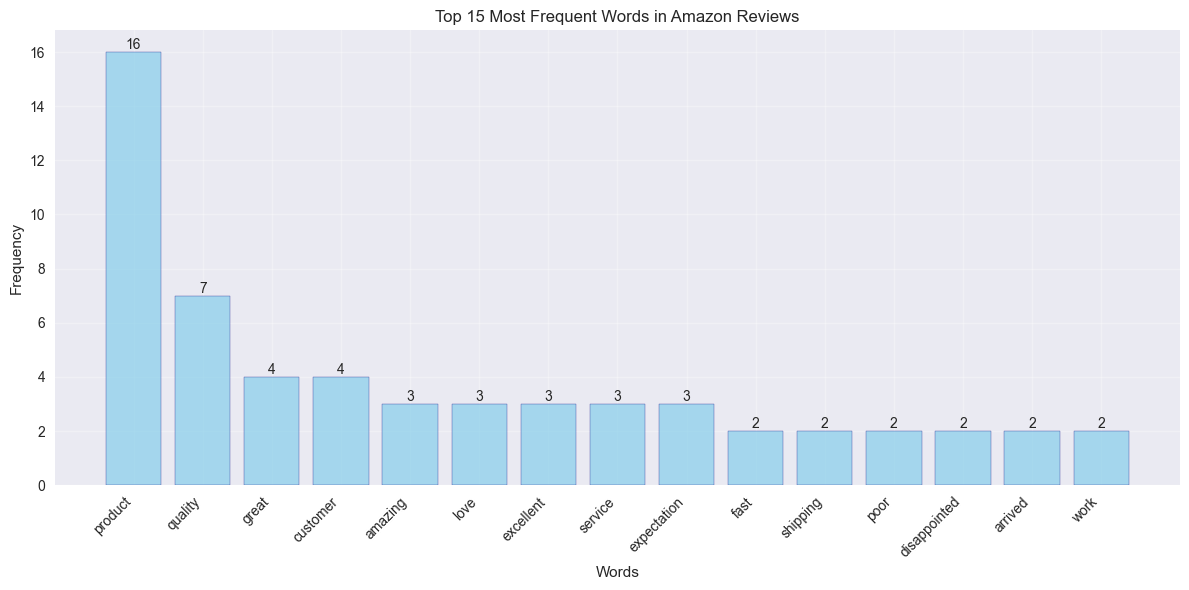

In [10]:
# Create word frequency visualization
top_words = [word for word, freq in most_common_words[:15]]
top_freqs = [freq for word, freq in most_common_words[:15]]

# Bar plot of most frequent words
plt.figure(figsize=(12, 6))
bars = plt.bar(top_words, top_freqs, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Frequent Words in Amazon Reviews')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

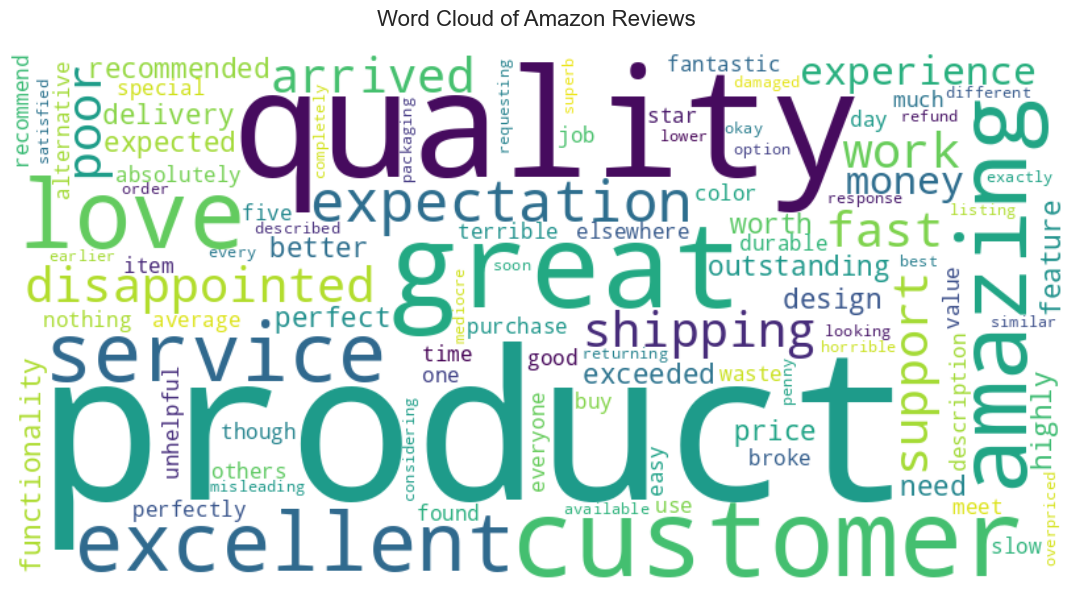

In [11]:
# Create word cloud
# Join all processed text
all_text = ' '.join(df['processed_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     colormap='viridis',
                     max_words=100,
                     relative_scaling=0.5,
                     random_state=42).generate(all_text)

# Display word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Amazon Reviews', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Step 10: Interactive Visualization with Plotly

Let's create interactive visualizations using Plotly.

In [12]:
# Interactive bar chart of word frequencies
fig = px.bar(x=top_words, y=top_freqs, 
             title='Top 15 Most Frequent Words (Interactive)',
             labels={'x': 'Words', 'y': 'Frequency'},
             color=top_freqs,
             color_continuous_scale='viridis')

fig.update_layout(showlegend=False, height=500)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

# Interactive scatter plot of text length vs rating
fig2 = px.scatter(df, x='text_length', y='rating', 
                  color='category',
                  title='Review Text Length vs Rating by Category',
                  labels={'text_length': 'Text Length (characters)', 'rating': 'Rating'},
                  hover_data=['word_count', 'token_count'])

fig2.update_layout(height=500)
fig2.show()

## Step 11: Sentiment Analysis by Words

Let's analyze positive and negative words in our reviews.

Sentiment Analysis:
Average positive words per review: 1.05
Average negative words per review: 0.55
Average sentiment score: 0.50


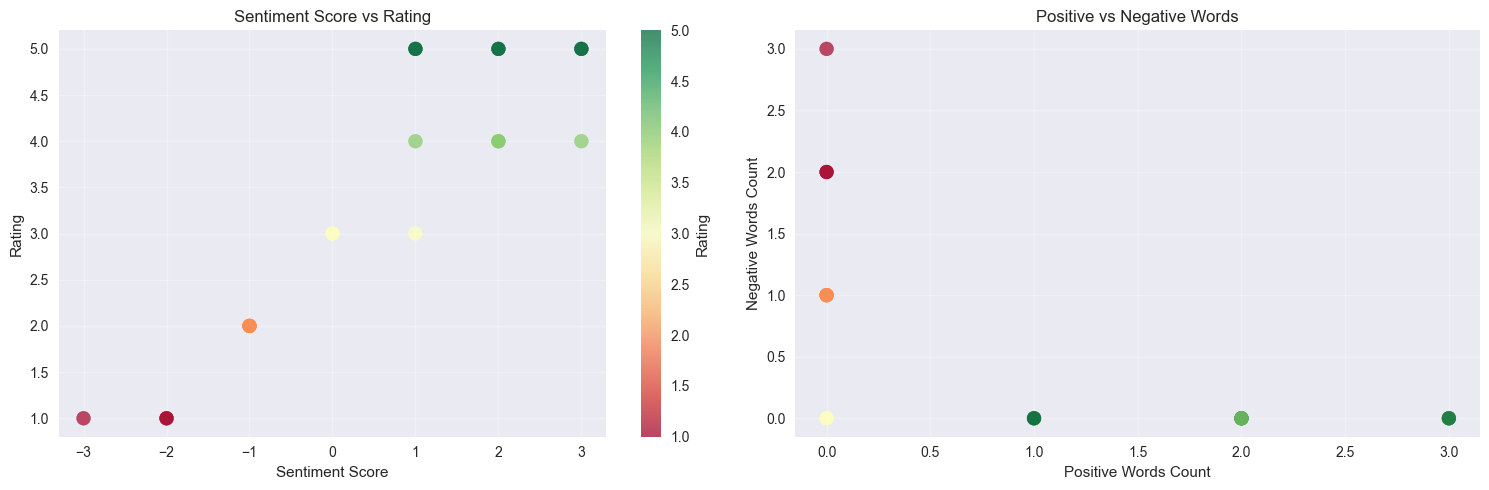

In [13]:
# Define positive and negative words
positive_words = ['amazing', 'excellent', 'great', 'good', 'love', 'perfect', 'outstanding', 
                 'fantastic', 'superb', 'wonderful', 'awesome', 'brilliant', 'satisfied']

negative_words = ['poor', 'terrible', 'disappointed', 'horrible', 'bad', 'worst', 'awful', 
                 'waste', 'broken', 'damaged', 'unhelpful', 'misleading', 'overpriced']

# Count positive and negative words in each review
def count_sentiment_words(tokens, word_list):
    return sum(1 for token in tokens if token in word_list)

df['positive_words'] = df['processed_tokens'].apply(lambda x: count_sentiment_words(x, positive_words))
df['negative_words'] = df['processed_tokens'].apply(lambda x: count_sentiment_words(x, negative_words))
df['sentiment_score'] = df['positive_words'] - df['negative_words']

# Analyze sentiment distribution
print("Sentiment Analysis:")
print(f"Average positive words per review: {df['positive_words'].mean():.2f}")
print(f"Average negative words per review: {df['negative_words'].mean():.2f}")
print(f"Average sentiment score: {df['sentiment_score'].mean():.2f}")

# Visualize sentiment vs rating
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment score vs rating
scatter = axes[0].scatter(df['sentiment_score'], df['rating'], 
                         c=df['rating'], cmap='RdYlGn', 
                         alpha=0.7, s=100)
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Rating')
axes[0].set_title('Sentiment Score vs Rating')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Rating')

# Positive vs negative words
axes[1].scatter(df['positive_words'], df['negative_words'], 
               c=df['rating'], cmap='RdYlGn', 
               alpha=0.7, s=100)
axes[1].set_xlabel('Positive Words Count')
axes[1].set_ylabel('Negative Words Count')
axes[1].set_title('Positive vs Negative Words')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 12: Prepare for Vectorization

Let's prepare our text data for machine learning by creating different vectorization approaches.

In [14]:
# Prepare text data for vectorization
processed_texts = df['processed_text'].tolist()

# 1. Count Vectorization
print("1. Count Vectorization:")
count_vectorizer = CountVectorizer(max_features=100, ngram_range=(1, 2))
count_matrix = count_vectorizer.fit_transform(processed_texts)

print(f"Count matrix shape: {count_matrix.shape}")
print(f"Feature names (first 10): {count_vectorizer.get_feature_names_out()[:10]}")

# 2. TF-IDF Vectorization
print("\n2. TF-IDF Vectorization:")
tfidf_vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_texts)

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"Feature names (first 10): {tfidf_vectorizer.get_feature_names_out()[:10]}")

# Show sample vectors
print("\nSample Count Vector (first review):")
print(count_matrix[0].toarray().flatten()[:20])

print("\nSample TF-IDF Vector (first review):")
print(tfidf_matrix[0].toarray().flatten()[:20])

1. Count Vectorization:
Count matrix shape: (20, 100)
Feature names (first 10): ['absolutely' 'amazing' 'arrived' 'better' 'customer' 'customer service'
 'delivery' 'design' 'disappointed' 'exceeded']

2. TF-IDF Vectorization:
TF-IDF matrix shape: (20, 100)
Feature names (first 10): ['absolutely' 'amazing' 'arrived' 'better' 'customer' 'customer service'
 'delivery' 'design' 'disappointed' 'exceeded']

Sample Count Vector (first review):
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]

Sample TF-IDF Vector (first review):
[0.36848702 0.2922748  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.32390573 0.
 0.         0.26773995]


## Step 13: Vocabulary Analysis

Let's analyze the vocabulary created by our vectorizers.

Count vectorizer vocabulary size: 100
TF-IDF vectorizer vocabulary size: 100

Top 15 most important features (TF-IDF):
             feature  importance
54           product    2.550552
67           quality    1.805126
19             great    1.180064
4           customer    1.061501
23              love    1.049185
12       expectation    1.030622
8       disappointed    0.996022
13          expected    0.979214
1            amazing    0.874689
70           service    0.869827
5   customer service    0.869827
7             design    0.838826
18     functionality    0.838826
11         excellent    0.825484
24             money    0.752568


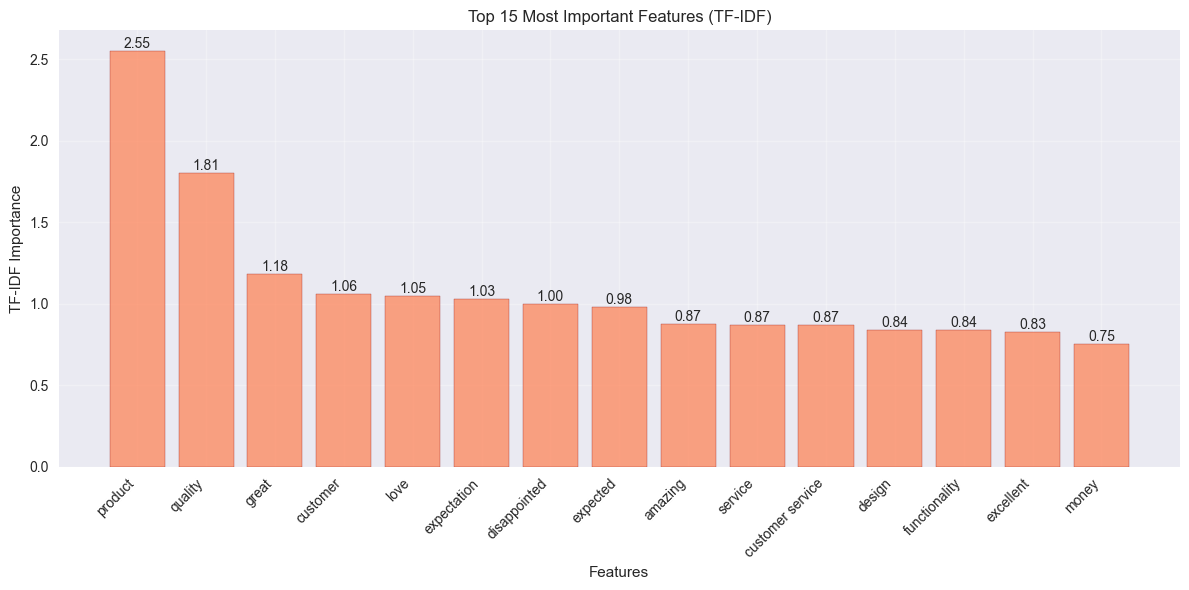

In [15]:
# Analyze vocabulary
count_features = count_vectorizer.get_feature_names_out()
tfidf_features = tfidf_vectorizer.get_feature_names_out()

print(f"Count vectorizer vocabulary size: {len(count_features)}")
print(f"TF-IDF vectorizer vocabulary size: {len(tfidf_features)}")

# Get feature importance from TF-IDF
feature_importance = tfidf_matrix.sum(axis=0).A1
feature_importance_df = pd.DataFrame({
    'feature': tfidf_features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 15 most important features (TF-IDF):")
print(feature_importance_df.head(15))

# Visualize feature importance
top_features = feature_importance_df.head(15)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_features['feature'], top_features['importance'], 
               color='coral', edgecolor='darkred', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('TF-IDF Importance')
plt.title('Top 15 Most Important Features (TF-IDF)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Step 14: Final Analysis and Summary

Let's create a comprehensive summary of our analysis.

In [16]:
# Create final summary
print("=" * 60)
print("AMAZON REVIEWS ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"• Total reviews: {len(df)}")
print(f"• Average rating: {df['rating'].mean():.2f}")
print(f"• Rating distribution: {dict(df['rating'].value_counts().sort_index())}")
print(f"• Categories: {df['category'].unique()}")

print(f"\n📝 TEXT STATISTICS:")
print(f"• Average text length: {df['text_length'].mean():.0f} characters")
print(f"• Average word count: {df['word_count'].mean():.0f} words")
print(f"• Average tokens after preprocessing: {df['token_count'].mean():.0f}")
print(f"• Total unique vocabulary: {len(set(all_tokens))} words")

print(f"\n💭 SENTIMENT ANALYSIS:")
print(f"• Average positive words: {df['positive_words'].mean():.2f}")
print(f"• Average negative words: {df['negative_words'].mean():.2f}")
print(f"• Average sentiment score: {df['sentiment_score'].mean():.2f}")

print(f"\n🔤 MOST FREQUENT WORDS:")
for i, (word, freq) in enumerate(most_common_words[:10], 1):
    print(f"• {i}. {word}: {freq} times")

print(f"\n🎯 VECTORIZATION RESULTS:")
print(f"• Count vectorizer features: {count_matrix.shape[1]}")
print(f"• TF-IDF vectorizer features: {tfidf_matrix.shape[1]}")
print(f"• Data ready for machine learning: ✅")

print(f"\n🎓 LEARNING OBJECTIVES ACHIEVED:")
print(f"• ✅ Loaded and explored text dataset")
print(f"• ✅ Applied tokenization and preprocessing")
print(f"• ✅ Removed stopwords successfully")
print(f"• ✅ Visualized word frequencies and patterns")
print(f"• ✅ Prepared data for vectorization")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE! 🎉")
print("=" * 60)

AMAZON REVIEWS ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
• Total reviews: 20
• Average rating: 3.30
• Rating distribution: {1: 3, 2: 4, 3: 3, 4: 4, 5: 6}
• Categories: ['Electronics' 'Books' 'Home & Garden' 'Sports']

📝 TEXT STATISTICS:
• Average text length: 82 characters
• Average word count: 12 words
• Average tokens after preprocessing: 8
• Total unique vocabulary: 100 words

💭 SENTIMENT ANALYSIS:
• Average positive words: 1.05
• Average negative words: 0.55
• Average sentiment score: 0.50

🔤 MOST FREQUENT WORDS:
• 1. product: 16 times
• 2. quality: 7 times
• 3. great: 4 times
• 4. customer: 4 times
• 5. amazing: 3 times
• 6. love: 3 times
• 7. excellent: 3 times
• 8. service: 3 times
• 9. expectation: 3 times
• 10. fast: 2 times

🎯 VECTORIZATION RESULTS:
• Count vectorizer features: 100
• TF-IDF vectorizer features: 100
• Data ready for machine learning: ✅

🎓 LEARNING OBJECTIVES ACHIEVED:
• ✅ Loaded and explored text dataset
• ✅ Applied tokenization and preprocessing
• ✅ Removed stopw

## Step 15: Save Processed Data

Let's save our processed data for future use.

In [17]:
# Save processed data
output_file = 'data/processed_amazon_reviews.csv'
df.to_csv(output_file, index=False)
print(f"Processed data saved to: {output_file}")

# Save vectorizer models
import pickle

with open('data/count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)
    
with open('data/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
    
print("Vectorizers saved successfully!")

# Create a summary report
with open('data/analysis_summary.txt', 'w') as f:
    f.write("Amazon Reviews Analysis Summary\n")
    f.write("=" * 40 + "\n\n")
    f.write(f"Dataset size: {len(df)} reviews\n")
    f.write(f"Average rating: {df['rating'].mean():.2f}\n")
    f.write(f"Unique vocabulary: {len(set(all_tokens))} words\n")
    f.write(f"Most frequent word: {most_common_words[0][0]} ({most_common_words[0][1]} times)\n")
    f.write("\nTop 10 words:\n")
    for word, freq in most_common_words[:10]:
        f.write(f"- {word}: {freq}\n")
        
print("Summary report saved to: data/analysis_summary.txt")

Processed data saved to: data/processed_amazon_reviews.csv
Vectorizers saved successfully!
Summary report saved to: data/analysis_summary.txt


## Conclusion

Congratulations! You have successfully completed the Amazon Reviews Analysis Laboratory. 

### What we accomplished:

1. **Data Loading**: Loaded and explored a dataset of Amazon reviews
2. **Text Preprocessing**: Cleaned text by removing special characters and converting to lowercase
3. **Tokenization**: Split text into individual words/tokens
4. **Stopword Removal**: Removed common English stopwords
5. **Text Visualization**: Created word clouds and frequency plots
6. **Vectorization**: Prepared text data for machine learning using Count and TF-IDF vectorizers
7. **Sentiment Analysis**: Analyzed positive and negative sentiment words
8. **Data Export**: Saved processed data and models for future use

### Next Steps:

The processed data is now ready for:
- **Machine Learning**: Classification, clustering, or regression models
- **Sentiment Analysis**: Advanced sentiment classification
- **Topic Modeling**: Discovering themes in reviews
- **Recommendation Systems**: Product recommendation based on reviews

### Key Takeaways:

- Text preprocessing is crucial for NLP tasks
- Tokenization and stopword removal significantly reduce noise
- Visualization helps understand text patterns
- Vectorization transforms text into numerical format for ML
- Different vectorization methods serve different purposes

**Great job completing this laboratory! 🎉**